# Final Project Baseball Statistics

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats.mstats as stats

## Styles

In [3]:
sns.set_style("whitegrid")

## Reading files

### Batting

In [7]:
batting_df = pd.read_csv('../Data/Batting.csv')
batting_post_df = pd.read_csv('../Data/Battingpost.csv')

In [6]:
batting_df.head(2)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13,8,1,4,0,NaN,NaN,NaN,NaN,NaN


In [7]:
batting_df.tail(2)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
101330,zuninmi01,2015,1,SEA,AL,112,350,28,61,11,...,28,0,1,21,132,0,5,8,2,6
101331,zychto01,2015,1,SEA,AL,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
batting_post_df.head(2)

,yearID,round,playerID,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1884,WS,becanbu01,NY4,AA,1,2,0,1,0,...,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN
1,1884,WS,bradyst01,NY4,AA,3,10,1,0,0,...,0,0,NaN,0,1,0,NaN,NaN,NaN,NaN


In [9]:
batting_post_df.tail(2)

,yearID,round,playerID,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
11688,2015,ALCS,zobribe01,KCA,AL,6,25,8,8,3,...,4,0,0,2,2,0,0,0,0,1
11689,2015,WS,zobribe01,KCA,AL,5,23,5,6,4,...,0,0,0,3,2,2,0,0,0,0


# Batting average

Let's get an overview about batting averages which is defined by the number of "hits" divided by the number of "at bats".

In [10]:
# average_by_year() returns a dataframe which is grouped by some input variables, indexes them and returns a new dataframe

def average_by_year(dataframe, groupbyIndex, column1, column2, filterIndex):
    # create a new dataframe by selecting three columns, groupby index, and apply sum
    grouped = dataframe[[groupbyIndex, column1, column2]].groupby(groupbyIndex).sum()
    # filter out post or regular season
    if filterIndex == 'post':
        key = 'avg_post'
    elif filterIndex == 'regular':
        key = 'avg_regular'
    else:
        key = 'avg' 
    # add average to df
    grouped[key] = grouped[column1]/grouped[column2]
    
    return grouped

In [11]:
batting_average = average_by_year(batting_df,'yearID','H','AB','regular')
batting_post_average = average_by_year(batting_post_df, 'yearID', 'H', 'AB','post')

In [13]:
# rename some column names to avoid same column names
batting_average = batting_average.rename(columns = {'AB':'AB_regular'})
batting_post_average = batting_post_average.rename(columns = {'AB':'AB_post'})

In [17]:
# plot simplifies plotting required graphes

def plot(df1, df2, plot_column_df1, plot_column_df2, xlabel = '', ylabel = '', log_y=False, log_x=False):
    new_dataframe = pd.concat([dataframe1[plot_column_df1], dataframe2[plot_column_df2]], axis=1)
    new_dataframe.plot(figsize=(15,5), logy=log_y, logx=log_x)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    new_dataframe.plot(kind='box', figsize=(4,5), logy=log_y, logx=log_x)
    plt.ylabel(ylabel)

## If you like hits, go to the regular season!

As you can see in the graph below, the players perform much worse at bat during post season than regular season. 
The batting mean-average during regular season is 0.263, while 0.240 during post season.

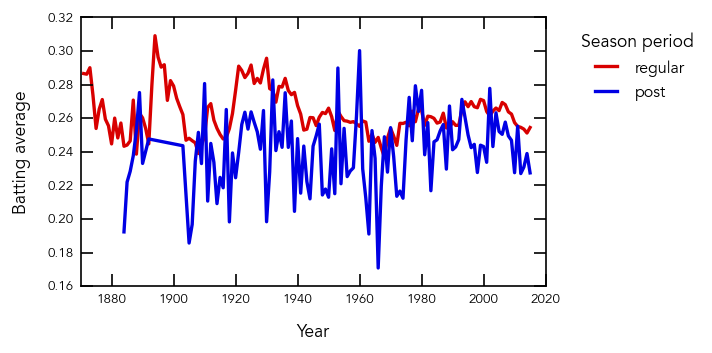

In [48]:
plt.style.use("../Style/myStyle.mplstyle")

plt.plot(batting_average.index, batting_average.avg_regular, label="regular")
plt.plot(batting_post_average.index, batting_post_average.avg_post, label="post")
plt.xlim((1870,2020))
plt.ylabel('Batting average', fontsize=10.5)
plt.xlabel('Year', fontsize=10.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.00), title='Season period', title_fontsize=10.5)

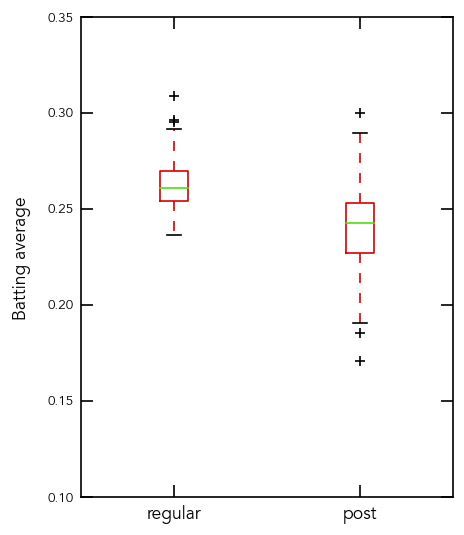

In [61]:
df = pd.concat([batting_average['avg_regular'], batting_post_average['avg_post']], axis=1)

df.plot(kind='box', figsize=(4,5))
plt.ylim([0.1, 0.35])
plt.ylabel('Batting average', fontsize=10.5)
plt.xticks([1, 2], ['regular', 'post'], fontsize=10.5)
plt.show()

Clearly, the standard deviation is higher in the post season dataset. One reason is the difference of total "at bats" in the two datasets. The regular season dataset contains two orders of magnitudes more "at bats". Please mind the logarithmic scale.

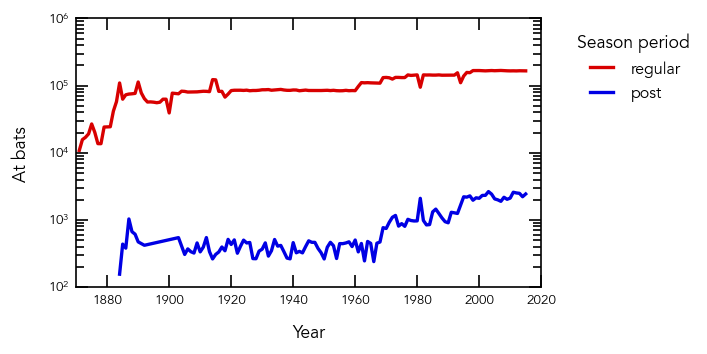

In [66]:
plt.plot(batting_average.index, batting_average.AB, label="regular")
plt.plot(batting_post_average.index, batting_post_average.AB, label="post")
plt.yscale("log")
plt.xlim((1870,2020))
plt.ylabel('At bats', fontsize=10.5)
plt.xlabel('Year', fontsize=10.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.00), title='Season period', title_fontsize=10.5)

## Post season players are better at bat!

Impressively, post season players clearly outperform the non post season playrs during regular season! In this regard, Baseball seems to be very fair: The better players/teams reach post season.   

In [85]:
def sum_grouped(dataframe, key1, key2):
    sum_grouped = dataframe.groupby([key1, key2], as_index=False).sum()
    return sum_grouped

In [86]:
batting_reduced = batting_df[['yearID', 'playerID', 'H', 'AB']]
batting_post_reduced = batting_post_df[['yearID', 'playerID', 'H', 'AB']]

batting_post_reduced_grouped = sum_grouped(batting_post_reduced, 'yearID', 'playerID')
batting_reduced_grouped = sum_grouped(batting_reduced, 'yearID', 'playerID')

In [77]:
# post season players 
batting_reduced_psp = pd.merge(batting_reduced_grouped, batting_post_reduced_grouped, how='inner', on=['yearID', 'playerID']) 
batting_by_years_psp = batting_reduced_psp.groupby('yearID').sum()
# rename column names in order to avoid mistakes
batting_by_years_psp = batting_by_years_psp.rename(columns = {'H_x':'H_regular_psp', 'AB_x':'AB_regular_psp', 'H_y':'H_post', 'AB_y':'AB_post'})

In [78]:
# creating new columns using vector algebra in order to determine averages 
batting_by_years_psp['avg_regular_psp']= batting_by_years_psp['H_regular_psp']/batting_by_years_psp['AB_regular_psp']
batting_by_years_psp['avg_post']= batting_by_years_psp['H_post']/batting_by_years_psp['AB_post']
batting_by_years_psp.tail(5)

,H_regular_psp,AB_regular_psp,H_post,AB_post,avg_regular_psp,avg_post
yearID,,,,,,
2011,11063.0,41299.0,660,2586,0.267876,0.255220
2012,12888.0,48690.0,573,2524,0.264695,0.227021
2013,13552.0,50791.0,575,2490,0.266819,0.230924
2014,13083.0,49606.0,530,2218,0.263738,0.238954
2015,13475.0,51913.0,554,2435,0.259569,0.227515


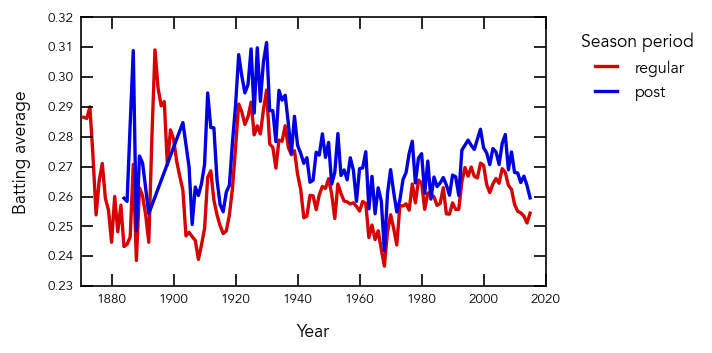

In [180]:
plt.plot(batting_average.index, batting_average.avg_regular, label="regular")
plt.plot(batting_by_years_psp.index, batting_by_years_psp.avg_regular_psp, label="post")
plt.xlim((1870,2020))
plt.ylabel('Batting average', fontsize=10.5)
plt.xlabel('Year', fontsize=10.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.00), title='Season period', title_fontsize=10.5)
plt.savefig("../Plots/BattingAverages.png")

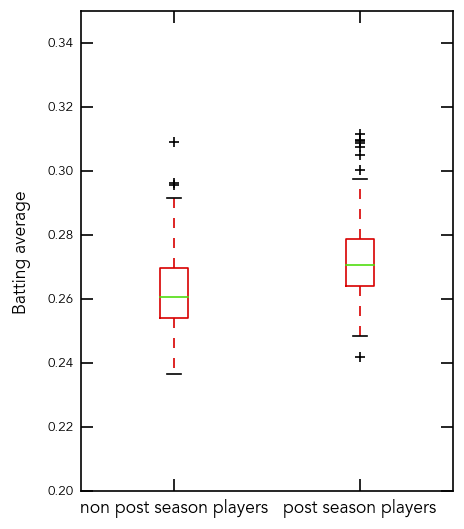

In [88]:
df = pd.concat([batting_average['avg_regular'], batting_by_years_psp['avg_regular_psp']], axis=1)

df.plot(kind='box', figsize=(4,5))
plt.ylim([0.2, 0.35])
plt.ylabel('Batting average', fontsize=10.5)
plt.xticks([1, 2], ['non post season players', 'post season players'], fontsize=10.5)
plt.show()

## Being better pays off!

We've seen that post season players outperform the non post season players during regular season. Let's now take a look if the superior skill is paid off in terms of salary!

In [91]:
salaries_df = pd.read_csv('../Data/Salaries.csv')

In [119]:
# ALL PLAYERS
# counting number of players per year
counts_by_years_all = salaries_df.groupby('yearID').count().rename(columns = {'salary':'counts'})
counts_by_years = pd.Series(counts_by_years_all['counts'])

# determining total salary per year
salaries_by_years_all = salaries_df.groupby('yearID').sum().rename(columns = {'salary':'total_salaries'})
salaries_by_years = pd.DataFrame(salaries_by_years_all['total_salaries'])

# determining average salary per year
average_salary_by_year = pd.concat([salaries_by_years, counts_by_years], axis=1)
average_salary_by_year['average_salary'] = average_salary_by_year['total_salaries']/average_salary_by_year['counts']

In [126]:
# POST SEASON PLAYERS ONLY
# creating a dataframe containing only the post season players
psp = pd.merge(salaries_df, batting_post_reduced_grouped, how='inner', on=['yearID', 'playerID'])

#counting total number of players per year
counts_by_years_psp = psp.groupby('yearID').count().rename(columns = {'salary':'counts'})
counts_psp = pd.Series(counts_by_years_psp['counts'])

# determing total salaries per year
salaries_by_years_psp = psp.groupby('yearID').sum().rename(columns = {'salary':'total_salaries'})
salaries_psp = pd.Series(salaries_by_years_psp['total_salaries'])

# determining average salary per year
average_salary_psp = pd.concat([salaries_psp, counts_psp], axis=1)
average_salary_psp['average_salary_psp'] = average_salary_psp['total_salaries']/average_salary_psp['counts']

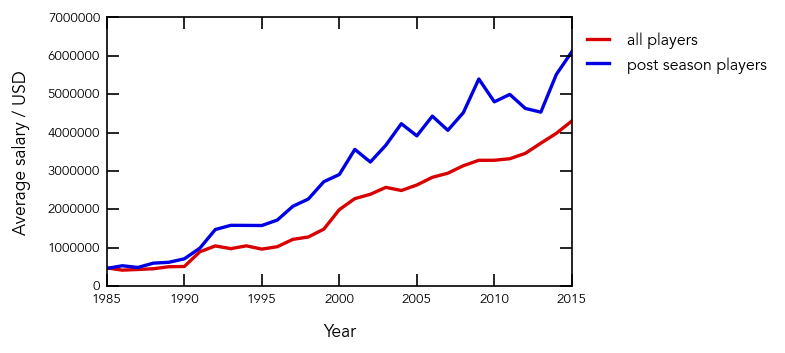

In [178]:
plt.plot(average_salary_by_year.index, average_salary_by_year.average_salary, label="all players")
plt.plot(average_salary_psp.index, average_salary_psp.average_salary_psp, label="post season players")
plt.xlim((1985,2015))
plt.ylabel('Average salary / USD', fontsize=10.5)
plt.xlabel('Year', fontsize=10.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1.00), title_fontsize=10.5)
plt.savefig("../Plots/salaries.png")

Being better pays off clearly!

## 3.5% better at bat results in 44.8% more salary!

### Salary

In [136]:
# determining relative salary deviation
relative_salary = pd.concat([average_salary_by_year, average_salary_psp], axis=1)
relative_salary['relative_deviation_salary'] = (relative_salary['average_salary_psp']-relative_salary['average_salary'])/relative_salary['average_salary']

# determining relative batting average deviation
relative_batting = pd.concat([batting_average, batting_by_years_psp], axis=1, join='inner')
relative_batting['relative_deviation_batting'] = (relative_batting['avg_regular_psp']-relative_batting['avg_regular'])/relative_batting['avg_regular']

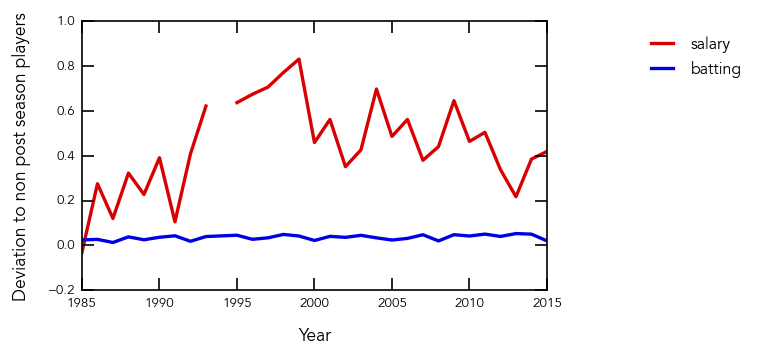

In [139]:
plt.plot(relative_salary.index, relative_salary.relative_deviation_salary, label="salary")
plt.plot(relative_batting.index, relative_batting.relative_deviation_batting, label="batting")
plt.xlim((1985,2015))
plt.ylabel('Deviation to non post season players', fontsize=10.5)
plt.xlabel('Year', fontsize=10.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1.00), title_fontsize=10.5)

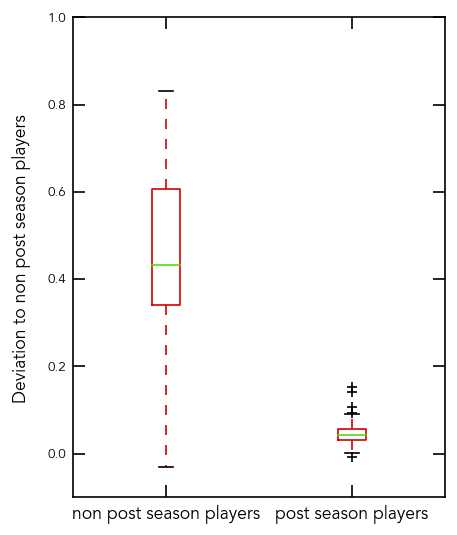

In [142]:
df = pd.concat([relative_salary['relative_deviation_salary'], relative_batting['relative_deviation_batting']], axis=1)

df.plot(kind='box', figsize=(4,5))
plt.ylim([-0.1, 1.0])
plt.ylabel('Deviation to non post season players', fontsize=10.5)
plt.xticks([1, 2], ['non post season players', 'post season players'], fontsize=10.5)
plt.show()

This graph blew my mind! The post season players have
overperformed only 3,5% at bat in average, but they have earned
44,8% more money on average over the last 30 years! Surely, the batting average isn’t the only variable, that determines
the salary.
Additionally, I asked myself: how strong are these two variables correlated?
Do relatively higher paid post season players hit more balls on
average? Yes, they slightly do!

## relative salary deviaton vs. relative batting deviation

### Correlation

In [161]:
# creating a new dataframe in order to plot a scatterplot
relative = pd.concat([relative_salary, relative_batting], axis=1, join='inner')

correlation = pd.DataFrame()
correlation['relative_deviation_batting'] = relative['relative_deviation_batting']
correlation['relative_deviation_salary'] = relative['relative_deviation_salary']

In [162]:
correlation.corr(method='pearson', min_periods=1)

,relative_deviation_batting,relative_deviation_salary
relative_deviation_batting,1.000000,0.268951
relative_deviation_salary,0.268951,1.000000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


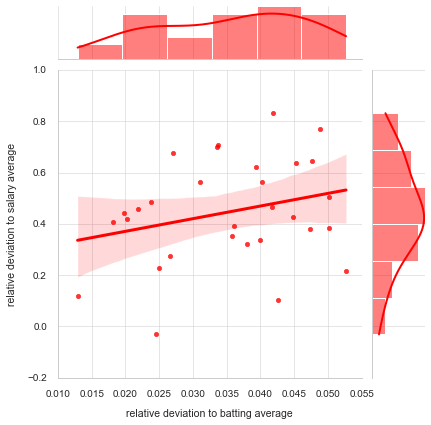

In [184]:
# plotting a jointplot in order to see the correlation
g = sns.jointplot("relative_deviation_batting", "relative_deviation_salary", data=correlation, kind='reg', color="r")
g.set_axis_labels('relative deviation to batting average', 'relative deviation to salary average', fontsize=10.5)
#g.savefig("../Plots/jointplot.png")